In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import random

In [4]:
from scipy.misc import imread

In [5]:
from scipy.misc import imresize

In [6]:
import numpy as np

In [7]:
import keras

C:\Users\Gurudeo\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from keras.models import Sequential


In [10]:
from keras.layers import Dense, Flatten, InputLayer,BatchNormalization

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
from keras.layers import Conv2D 

In [15]:
from keras.layers import MaxPooling2D

In [16]:
from keras.layers import Dropout

In [17]:
from keras import backend as K
K.set_image_dim_ordering('th')

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
data_dir='C:/Users/Gurudeo/Desktop/Age/'

In [20]:
data=pd.read_csv(os.path.join(data_dir, 'data.csv'))

In [21]:
msk = np.random.rand(len(data)) < 0.85

In [22]:
train = data[msk]
test = data[~msk]

In [23]:
images=[]

In [24]:
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Data', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') 
    images.append(img)

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


In [25]:
train_x=np.array(images)

In [26]:
train_x.shape

(16902, 32, 32, 3)

In [27]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [28]:
train_y=np.array(train_y)

In [29]:
images1=[]
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Data', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') 
    images1.append(img)

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [30]:
test_x=np.array(images1)

In [31]:
lb = LabelEncoder()
test_y = lb.fit_transform(test.Class)
test_y = keras.utils.np_utils.to_categorical(test_y)

In [32]:
test_y=np.array(test_y)

In [33]:
image_gen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.15, shear_range = 0.25,
                height_shift_range = 0.15, zoom_range = 0.2, horizontal_flip = True)


In [34]:
image_gen.fit(train_x, augment=True)

C:\Users\Gurudeo\Anaconda2\lib\site-packages\keras\preprocessing\image.py:748: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (16902, 32, 32, 3) (32 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


In [35]:
image_gen.fit(test_x, augment=True)

C:\Users\Gurudeo\Anaconda2\lib\site-packages\keras\preprocessing\image.py:748: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (3004, 32, 32, 3) (32 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


In [36]:
modelx=Sequential()

In [37]:
modelx.add(keras.layers.InputLayer(input_shape=(32,32,3)))

In [38]:
modelx.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),strides=(1, 1), padding='valid', data_format="channels_last"))

In [39]:
modelx.add(BatchNormalization())

In [40]:
modelx.add(Conv2D(32,(3,3),activation='relu'))

In [41]:
modelx.add(BatchNormalization())

In [42]:
modelx.add(MaxPooling2D())

In [43]:
modelx.add(Conv2D(64,(3,3),activation='relu'))

In [44]:
modelx.add(BatchNormalization())

In [45]:
modelx.add(Conv2D(64,(3,3),activation='relu'))

In [46]:
modelx.add(BatchNormalization())

In [47]:
modelx.add(MaxPooling2D())

In [48]:
modelx.add(Flatten())

In [49]:
modelx.add(Dropout(0.20))

In [50]:
modelx.add(Dense(512,activation='relu'))

In [51]:
modelx.add(Dropout(0.5))

In [52]:
modelx.add(Dense(3, activation='softmax'))

In [53]:
modelx.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 28, 30)        8672      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 28, 30)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 14, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 12, 13)        18496     
__________

In [54]:
modelx.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [55]:
gmodel=modelx.fit_generator(image_gen.flow(train_x, train_y, batch_size=64),
          steps_per_epoch= train_x.shape[0]/64,
          epochs=25,
         validation_data =image_gen.flow(test_x, test_y, batch_size=64), validation_steps = (train_x.shape[0]*0.15/64))

C:\Users\Gurudeo\Anaconda2\lib\site-packages\keras\preprocessing\image.py:935: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (16902, 32, 32, 3) (32 channels).
  ' (' + str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\Gurudeo\Anaconda2\lib\site-packages\keras\preprocessing\image.py:935: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (3004, 32, 32, 3) (32 channels).
  ' (' + str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/25
265/264 [==============================] - 511s 2s/step - loss: 1.0713 - acc: 0.5446 - val_loss: 0.8788 - val_acc: 0.5664
Epoch 2/25
265/264 [==============================] - 505s 2s/step - loss: 0.8504 - acc: 0.6074 - val_loss: 0.8289 - val_acc: 0.6250
Epoch 3/25
265/264 [==============================] - 505s 2s/step - loss: 0.8064 - acc: 0.6335 - val_loss: 0.7766 - val_acc: 0.6348
Epoch 4/25
265/264 [==============================] - 507s 2s/step - loss: 0.7828 - acc: 0.6521 - val_loss: 0.7664 - val_acc: 0.6465
Epoch 5/25
265/264 [==============================] - 506s 2s/step - loss: 0.7508 - acc: 0.6644 - val_loss: 0.7836 - val_acc: 0.6281
Epoch 6/25
265/264 [==============================] - 505s 2s/step - loss: 0.7319 - acc: 0.6774 - val_loss: 0.7338 - val_acc: 0.6742
Epoch 7/25
265/264 [==============================] - 503s 2s/step - loss: 0.7077 - acc: 0.6950 - val_loss: 0.7174 - val_acc: 0.6746
Epoch 8/25
265/264 [==============================] - 503s 2s/step - 

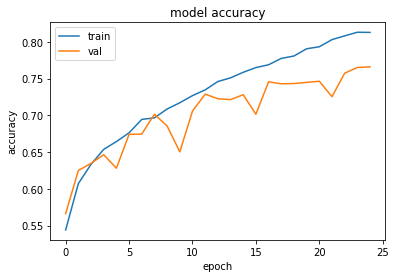

In [56]:
plt.plot(gmodel.history['acc'])
plt.plot(gmodel.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

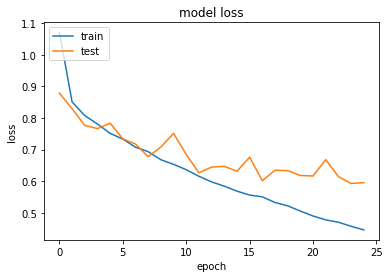

In [57]:
plt.plot(gmodel.history['loss'])
plt.plot(gmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()